# Môn: Phân tích xử lý ảnh
 * Sinh viên: Huỳnh Thị Bảo Trân
 * MSSV: 19110482
 * Bài thực hành: Lab02-Image Processing and Analysis

## Các thư viện được sử dụng

In [1]:
import cv2
import numpy as np
import pandas as pd
from pylab import imread
from matplotlib import pyplot as plt
from skimage import feature, filters, exposure, util
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, rotate
from skimage.exposure import rescale_intensity
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value

## Định nghĩa các hàm

In [2]:
def ImShows(ImageData, LabelData, rows, cols, gridType = False):
    # Convert ImageData and LabelData to List
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if(rows == 1 & cols == 1):
        fig = plt.figure(figsize = (20, 20))
    else:
        fig = plt.figure(figsize = (cols * 8, rows * 5))
    
    for i in range(1, cols * rows + 1):
        fig.add_subplot(rows, cols, i)
        image = ImageArray[i - 1]
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
            plt.grid(gridType)
        else:
            plt.imshow(image)
            plt.grid(gridType)
        plt.title(LabelArray[i - 1])
    
    plt.show()

In [3]:
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    ImShows(listImage, listCaption, row, col)

In [4]:
def ShowInformationImage(Image):
    Width = Image.shape[1]
    Height = Image.shape[0]
    Channel = len(Image.shape)
    print('Width:', Width, ', Height:', Height, ', Channel:', Channel)

    if(Channel == 2):
        print('Min Intensity:', Image.min(), ', Max Intensity:', Image.max())
    else:
        print('Red - Min Intensity:', Image[:, :, 0].min(), ', Max Intensity:', Image[:, :, 0].max())
        print('Green - Min Intensity:', Image[:, :, 1].min(), ', Max Intensity:', Image[:, :, 1].max())
        print('Blue - Min Intensity:', Image[:, :, 2].min(), ', Max Intensity:', Image[:, :, 2].max())

In [5]:
def IntToBitArray(Image) :
    row ,col = Image.shape
    list = []
    for i in range(row):
        for j in range(col):
             list.append(np.binary_repr(Image[i][j], width = 8))
    return list

In [6]:
def BitPlane(bitImgVal, img1D):
    bitList = [int(i[bitImgVal]) for i in img1D]
    return bitList

In [7]:
def GetBitImage(index, image2D):
    ImageIn1D = IntToBitArray(image2D)
    Imagebit = np.array( BitPlane(index, ImageIn1D))
    Imagebit = np.reshape(Imagebit, image2D.shape)
    return Imagebit

In [8]:
def GetAllBitImage(image2D):
    image2D_Bit = list()
    for i in range(8):
        image2D_Bit.append(GetBitImage(i, image2D))
    return image2D_Bit

In [9]:
def SegmentColorImageByMask(IM, Mask):    
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

In [10]:
# Edge Detection on Color Image
@adapt_rgb(each_channel)
def sobel_each(Image):
    return filters.sobel(Image)

@adapt_rgb(hsv_value)
def sobel_hsv(Image):
    return filters.sobel(Image)

## Thực hiện yêu cầu 1

1. Chọn 1 ảnh từ internet bất kỳ và thực hiện các thao tác sau 
* Viết thành một function cho biết thông tin của bức ảnh: Ảnh màu hay ảnh xám và giá trị min max tương ứng với cừng kênh màu
* Hiển thị 24 bức ảnh theo bit của từng kênh màu R, G, B (mỗi kênh 8 ảnh x 3 kênh = 24 ảnh bit) 
* Hiển thị 24 bức ảnh theo bit của từng kênh màu H, S, V (mỗi kênh 8 ảnh x 3 kênh = 24 ảnh bit) 
* Cho biết trong 24 ảnh bit theo kênh R, G, B có ảnh nào có thể dùng để trích xuất đối tượng hay không. Nếu có thì hiển thị ảnh bit đó ra
* Cho biết trong 24 ảnh bit theo kênh H, S, V có ảnh nào có thể dùng để trích xuất đối tượng hay không. Nếu có thì hiển thị ảnh bit đó ra

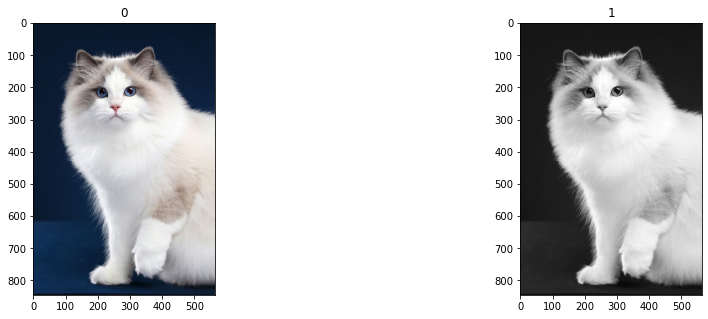

In [11]:
# Read Image 
image_color = imread('cat.jpg')
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowListImages([image_color, image_gray], 1, 2)

In [12]:
# Show Information of Color Image
Image = image_color.copy()
ShowInformationImage(Image)

Width: 564 , Height: 845 , Channel: 3
Red - Min Intensity: 0 , Max Intensity: 255
Green - Min Intensity: 0 , Max Intensity: 255
Blue - Min Intensity: 0 , Max Intensity: 255


In [13]:
# Show Information of Gray Image
Image = image_gray.copy()
ShowInformationImage(Image)

Width: 564 , Height: 845 , Channel: 2
Min Intensity: 0 , Max Intensity: 255


Original Size: (845, 564)
Rescaled Size 0.5: (422, 282)
Rescaled Size 0.25: (211, 141)


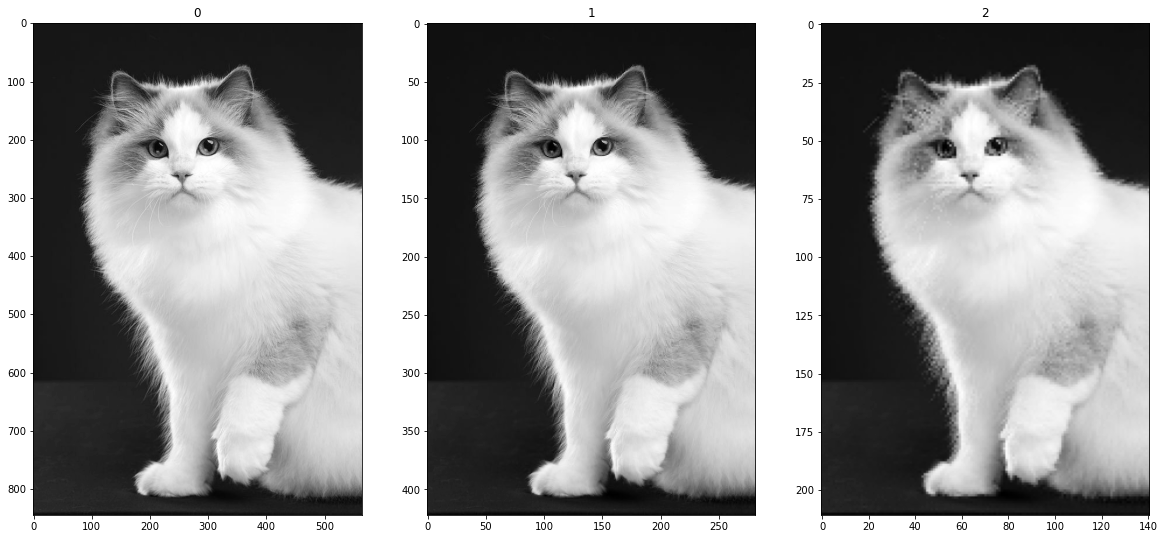

In [14]:
image_gray_rescaled_05 = rescale(image_gray, 0.5, anti_aliasing = False)
image_gray_rescaled_025 = rescale(image_gray, 0.25, anti_aliasing = False)

print('Original Size:', image_gray.shape)
print('Rescaled Size 0.5:', image_gray_rescaled_05.shape)
print('Rescaled Size 0.25:', image_gray_rescaled_025.shape)

ShowListImages([image_gray, image_gray_rescaled_05, image_gray_rescaled_025], 1, 3)

Original Size:  (845, 564)
Resized Size 0.5:  (300, 300)


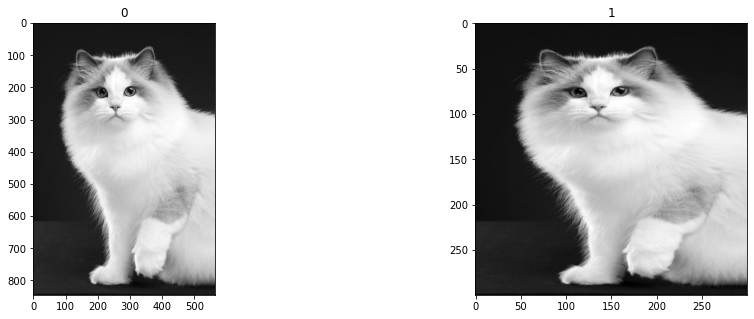

In [15]:
image_resized = resize(image_gray, (300, 300), anti_aliasing = True)

print('Original Size: ', image_gray.shape)
print('Resized Size 0.5: ', image_resized.shape)

ShowListImages([image_gray, image_resized], 1, 2)

In [16]:
# Get 8 Mask Image corresponding to 8 bit of grayscale image
image2D_Bit = GetAllBitImage(image_gray)

List have 8 images


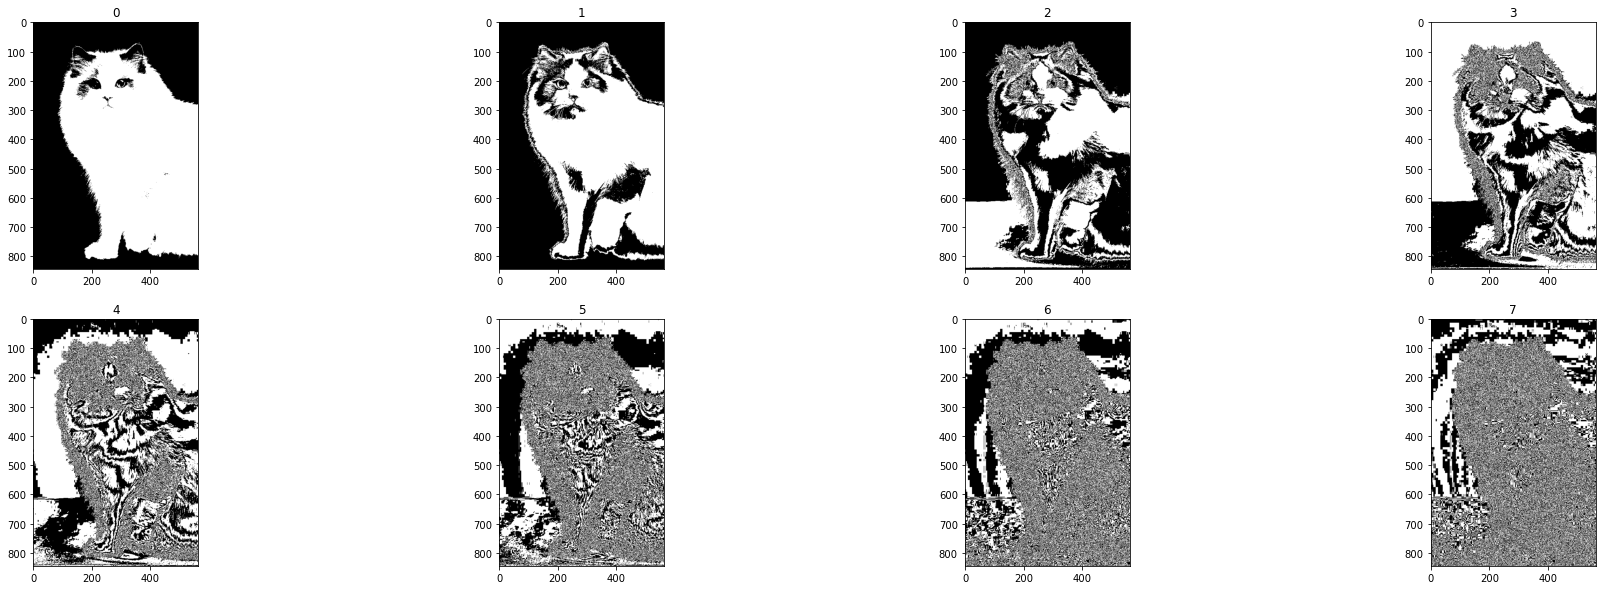

In [17]:
print('List have', len(image2D_Bit), 'images')
ShowListImages(image2D_Bit, 2, 4)

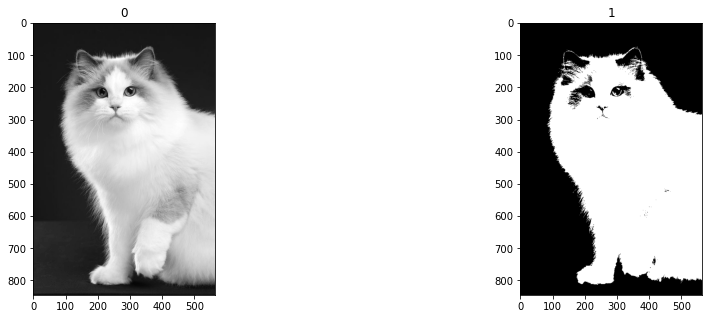

In [18]:
# Take the highest bit image 
CellMask01 = image2D_Bit[0]
ShowListImages([image_gray, CellMask01], 1, 2)

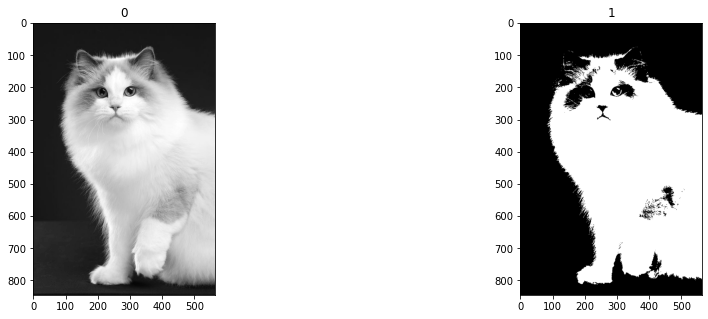

In [19]:
# Get color by range color in RGB from [0,0,150] to [255,255,255]
lower = np.array([0, 0, 150])
upper = np.array([255, 255, 255])
CellMask02 = cv2.inRange(image_color, lower, upper)
ShowListImages([image_gray, CellMask02], 1, 2)

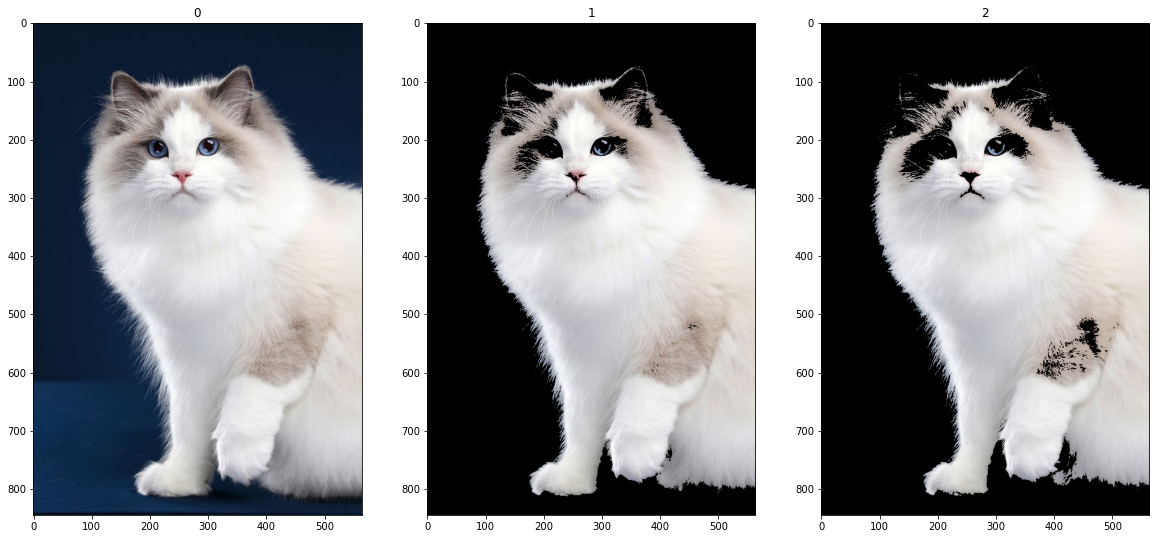

In [20]:
CellMask01_rgb = SegmentColorImageByMask(image_color, CellMask01)
CellMask02_rgb = SegmentColorImageByMask(image_color, CellMask02)
ShowListImages([image_color, CellMask01_rgb, CellMask02_rgb], 1, 3)

2. Chọn một bức ảnh có nhiều mặt người trên internet và thực hiện các thao tác sau 
* Viết 1 function input ảnh màu và xuất ảnh chân dung xám và chân dùng màu của ảnh đó 
* Tìm chọn range màu lower và upper để trích xuất được các khuôn mặt trong ảnh màu 

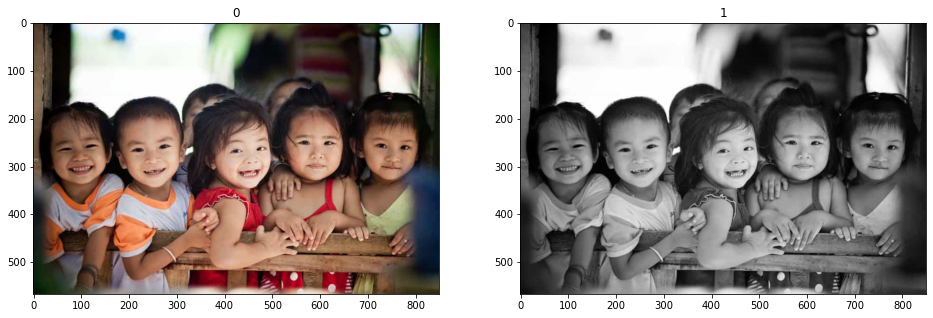

In [21]:
# Read Image 
image_color = imread('child.jpg')
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowListImages([image_color, image_gray], 1, 2)

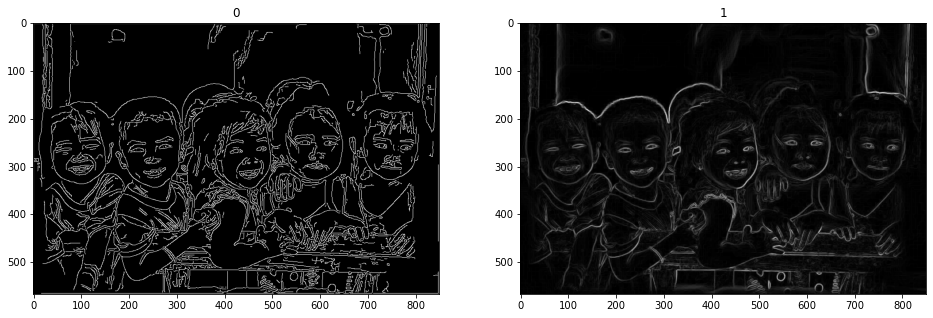

In [22]:
edges_canny = feature.canny(image_gray) # Canny
edges_sobel = filters.sobel(image_gray) # Sobel

ShowListImages([edges_canny, edges_sobel], 1, 2)

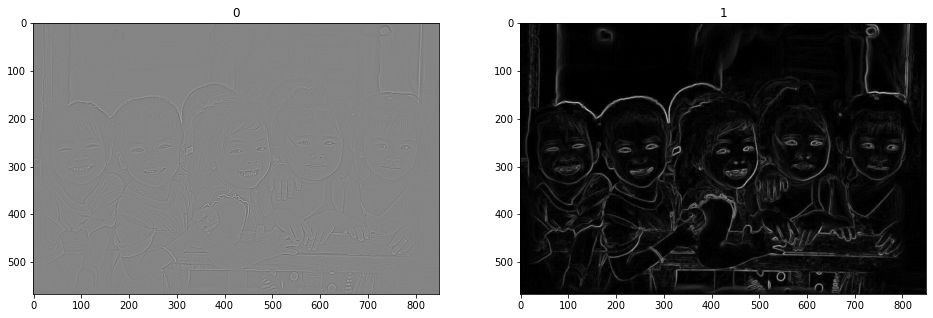

In [23]:
edges_laplace = filters.laplace(image_gray) # Laplacian
edges_scharr = filters.scharr(image_gray) # Scharr

ShowListImages([edges_laplace, edges_scharr], 1, 2)

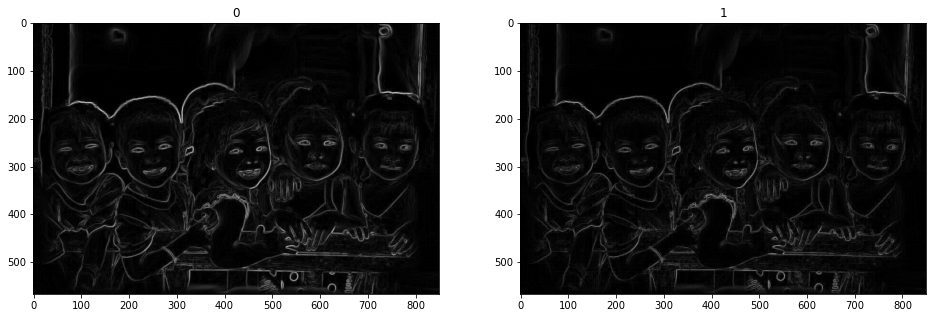

In [24]:
edges_prewitt = filters.prewitt(image_gray) # Prewitt
edges_roberts = filters.roberts(image_gray) # Roberts

ShowListImages([edges_prewitt, edges_roberts], 1, 2)

In [25]:
# Show Information of Gray Image
Image = edges_sobel.copy()
ShowInformationImage(Image)

Width: 850 , Height: 567 , Channel: 2
Min Intensity: 0.0 , Max Intensity: 0.5785518319236592


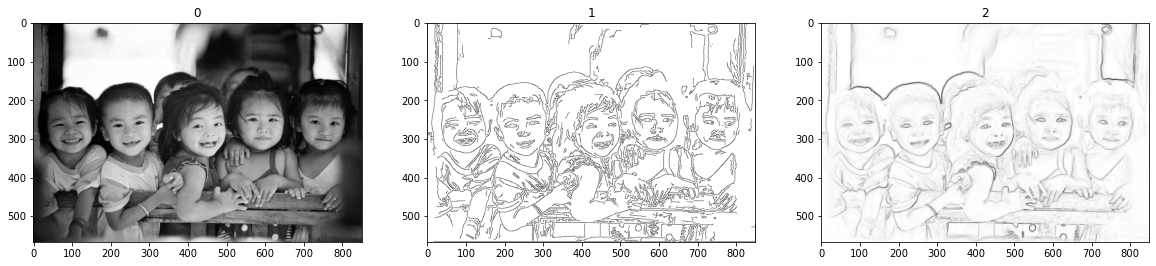

In [26]:
# Invert 
ShowListImages([image_gray, 1 - edges_canny, 1 - edges_sobel], 1, 3)

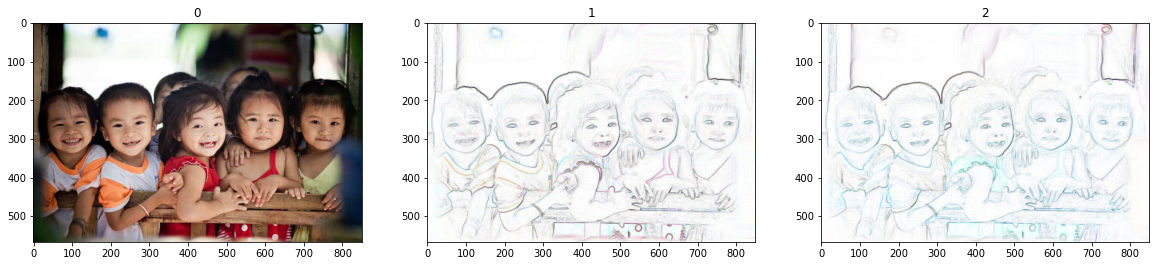

In [27]:
image_sobel_rgb = rescale_intensity(1 - sobel_each(image_color))
image_sobel_hsv = rescale_intensity(1 - sobel_hsv(image_color))

ShowListImages([image_color, image_sobel_rgb, image_sobel_hsv], 1, 3)

3.  Chọn một bức ảnh từ internet về 1 đồ vật và thực hiện các thao tác sau :
* Xuất ảnh xoay các góc 30,45,60 độ
* Xuất ảnh đối xứng qua trục hoành và trục tung đi qua tâm ảnh
* Xuất ảnh inversion
* Xuất ảnh enhance contrast
* Xuất ảnh gamma và log enhancement 

Image Size: (1232, 1202, 3)


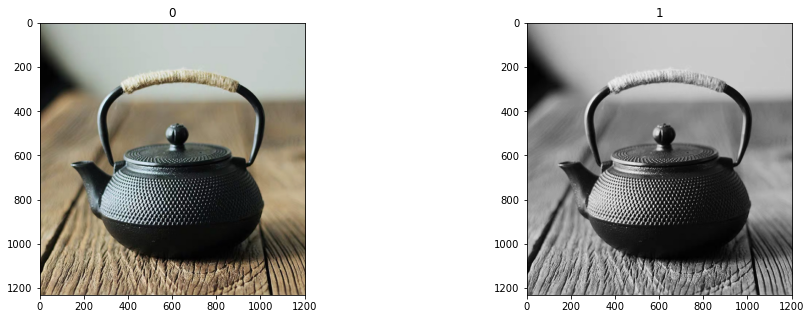

In [28]:
# Read Image 
image_color = imread('tea.jpg')
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
print('Image Size:', image_color.shape)
ShowListImages([image_color, image_gray], 1, 2)

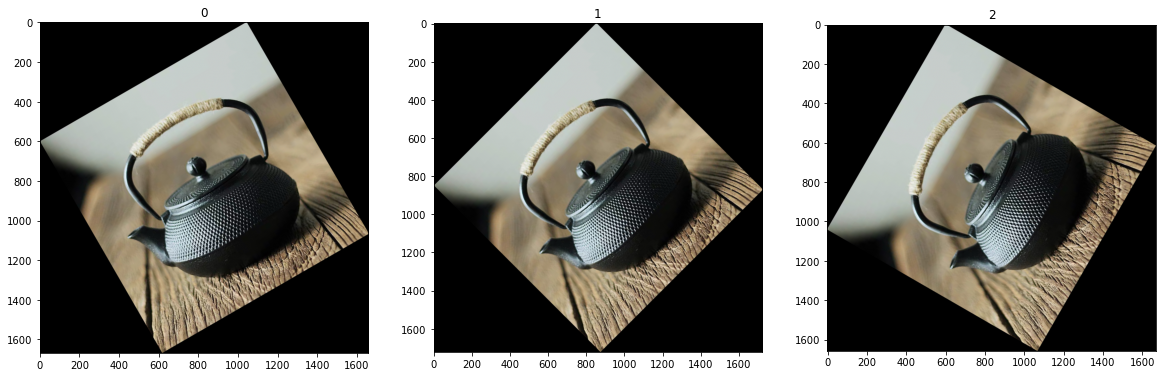

In [29]:
image_color_rotate_30 = rotate(image_color, 30, resize = True)
image_color_rotate_45 = rotate(image_color, 45, resize = True)
image_color_rotate_60 = rotate(image_color, 60, resize = True)
ShowListImages([image_color_rotate_30, image_color_rotate_45, image_color_rotate_60], 1, 3)

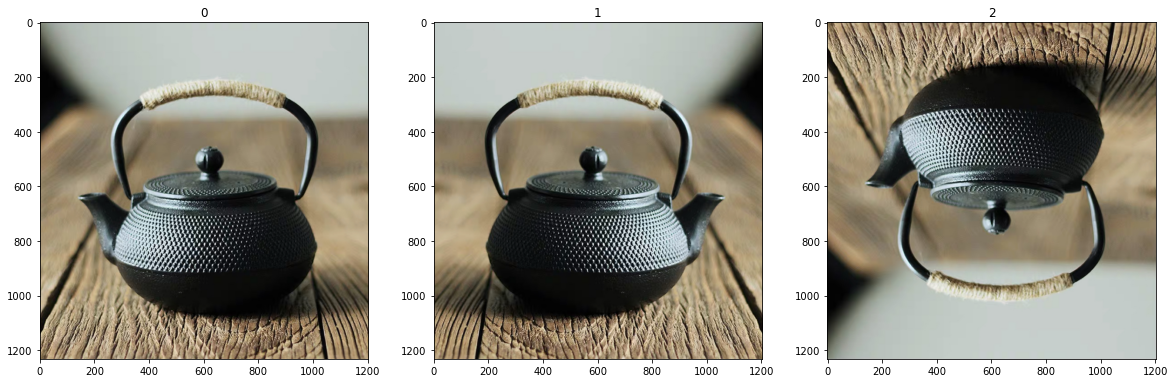

In [30]:
image_color_horizontal_flip = image_color[:, ::-1]
image_color_vertical_flip = image_color[::-1, :]
ShowListImages([image_color, image_color_horizontal_flip, image_color_vertical_flip], 1, 3)

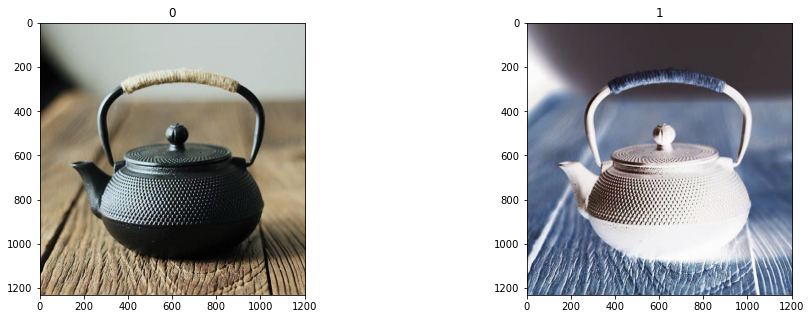

In [31]:
image_color_inversion = util.invert(image_color)
ShowListImages([image_color, image_color_inversion], 1, 2)

16.0 202.0


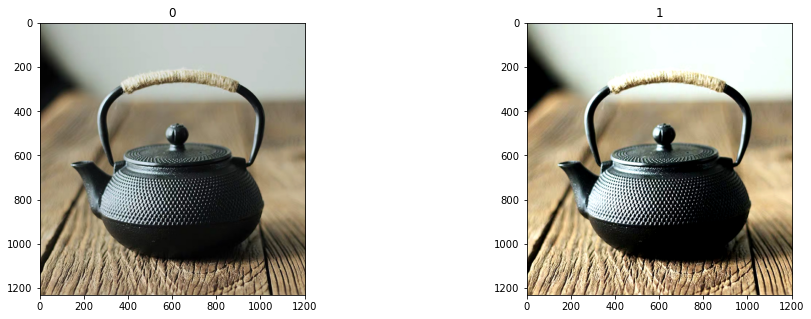

In [32]:
# take from 10 to 90 percent of color range
v_min, v_max = np.percentile(image_color, (10, 90))
better_contrast = exposure.rescale_intensity(image_color, in_range = (v_min, v_max))

print(v_min, v_max)
ShowListImages([image_color, better_contrast], 1, 2)

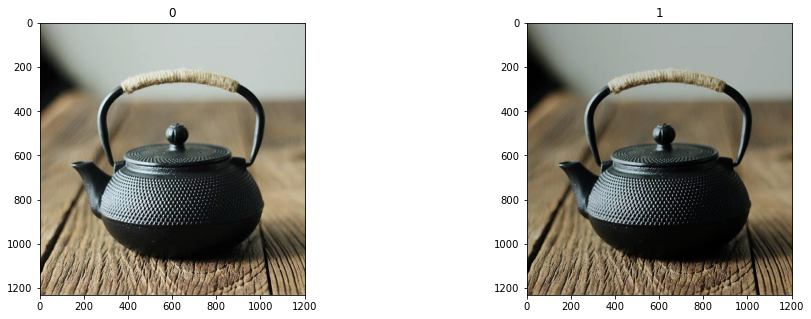

In [33]:
# gamma and gain parameters are between 0 and 1
adjusted_gamma_image = exposure.adjust_gamma(image_color, gamma = 1.2, gain = 0.9)
ShowListImages([image_color, adjusted_gamma_image], 1, 2)

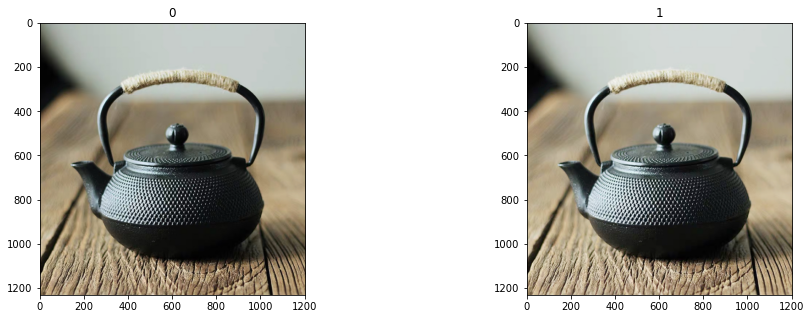

In [34]:
# Logarithmic corrected
log_correction_image = exposure.adjust_log(image_color)

ShowListImages([image_color, log_correction_image], 1, 2)